In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dataclasses import dataclass, field, asdict
import argparse

from AOUP import Parameter, AOUP

In [2]:
slope, Lambda, velocity = 1, 2, 10

parameter = Parameter(
    N_particle = 100,
    N_ensemble = 1000,
    velocity = velocity,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = 40,
    gamma = 1.0,
    temperature = 1.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = 10000,
    sampling = 100,
    interval = 1000,
    potential = "quartic"
)

print(parameter)

Parameter(N_particle=100, N_ensemble=1000, velocity=10, Lambda=2, boundary=5.0, N_bins=40, gamma=1.0, slope=1, temperature=1.0, tau=1.0, Da=1.0, delta_t=0.001, initial=10000, sampling=100, interval=1000, potential='quartic')


In [3]:
aoup = AOUP(parameter)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

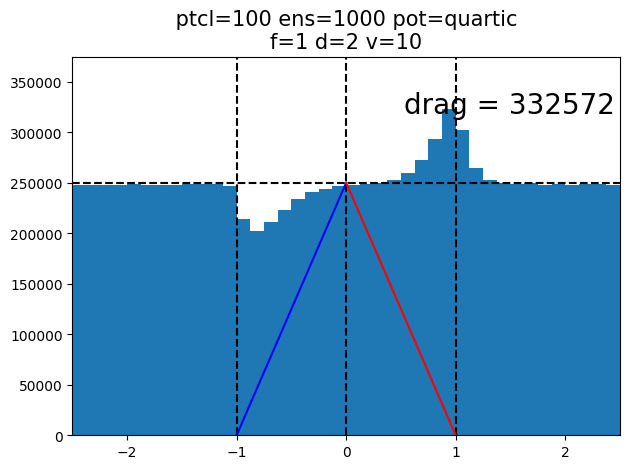

In [4]:
aoup.average_distribution(frames=100)

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

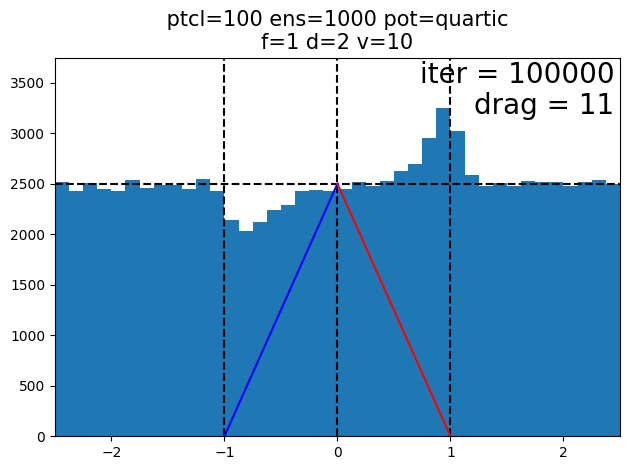

In [4]:
aoup.histogram(frames=100, fps=30)

In [ ]:
# aoup.phase_space(frames=100)